In [1]:
# git clone package:
# !git clone <path_package>
# or copy package :
!cp -r /kaggle/input/autonlp-git/SentimentML-main /kaggle/working

In [2]:
import os
# directory of package :
fd = os.open("/kaggle/working/SentimentML-main", os.O_RDONLY )
os.fchdir(fd)
os.getcwd()

'/kaggle/working/SentimentML-main'

In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 561 kB 2.1 MB/s 
     |████████████████████████████████| 7.7 MB 34.8 MB/s 
     |████████████████████████████████| 280 kB 57.2 MB/s 
     |████████████████████████████████| 11.6 MB 37.8 MB/s 
     |████████████████████████████████| 85 kB 3.5 MB/s 
     |████████████████████████████████| 80 kB 8.0 MB/s 
     |████████████████████████████████| 23.9 MB 35.5 MB/s 
     |████████████████████████████████| 2.6 MB 43.9 MB/s 
     |████████████████████████████████| 283 kB 57.8 MB/s 
     |████████████████████████████████| 70 kB 6.3 MB/s 
     |████████████████████████████████| 10.8 MB 34.5 MB/s 
     |████████████████████████████████| 301 kB 41.4 MB/s 
     |████████████████████████████████| 166.7 MB 17 kB/s 
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 12.8 MB 21.5 MB/s 
     |████████████████████████████████| 394.3 MB 11 kB/s 
     |████████████████████████████████| 47.5 MB 246 kB/s 
     |█████████████

In [4]:
!pip install -U sentence-transformers

  Using cached sentence_transformers-2.0.0-py3-none-any.whl
     |████████████████████████████████| 2.9 MB 2.1 MB/s 
  Using cached huggingface_hub-0.0.17-py3-none-any.whl (52 kB)
  Attempting uninstall: transformers
    Found existing installation: transformers 4.0.1
    Uninstalling transformers-4.0.1:
      Successfully uninstalled transformers-4.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 1.3.0 requires transformers<4.1,>=4.0, but you have transformers 4.11.0 which is incompatible.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
# if png doesn't save correctly
!pip install kaleido

     |████████████████████████████████| 79.9 MB 64.5 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
# if spacy can't load spacy model :
!python3 -m spacy download fr_core_news_md

⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
     |████████████████████████████████| 46.1 MB 1.4 MB/s 
  Created wheel for fr-core-news-md: filename=fr_core_news_md-2.3.0-py3-none-any.whl size=46100669 sha256=a61eeebdb8e314d1d213239261e586a5a1157f7571a1c67f642c9855a0826095
  Stored in directory: /tmp/pip-ephem-wheel-cache-63rj7lko/wheels/62/a5/93/9c82d8ae84430ed80720262c11726d046d3444af301b7d2895
Successfully built fr-core-news-md
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')


# Import

In [7]:
import pandas as pd
from autonlp.autonlp import AutoNLP
import os
from pathlib import Path
from autonlp.flags import Flags, save_yaml
import dataclasses

# Flags update (parameters)

In [8]:
#####################
# Parameters
#####################

flags_dict_info = {
    "path_data": "/kaggle/input/finance-corpus/FinancialPhraseBank_train.csv",
    "path_data_validation": "",
    "apply_logs": True,
    "outdir": "/kaggle/working/logs",
    "seed": 15,
    "debug": False,  # for debug : use only 50 data rows for training
}
flags_dict_preprocessing = {
    "column_text": "text_fr",  # name column with texts
    "target": "sentiment",     # name column with targets
    "language_text": "fr",
    "apply_small_clean": True,
    "name_spacy_model": "fr_core_news_md",
    "apply_spacy_preprocessing": True,
    "apply_entity_preprocessing": True
}

flags_dict_autonlp = {
    "objective": 'multi-class',    # 'binary' or 'multi-class' or 'regression'
    
    "embedding": {"tf": 1, "tf-idf": 2, "word2vec": None, "fasttext": None, "doc2vec": None, "transformer": None},
    
    "classifier": {"Naive_Bayes": [1], "Logistic_Regression": [1], "SGD_Classifier": [2],
                   "XGBoost": [], "Global_Average": [], "Attention": [], "BiRNN": [], "BiRNN_Attention": [],
                   "biLSTM": [], "BiLSTM_Attention": [], "biGRU": [], "BiGRU_Attention": []},
    
    "max_run_time_per_model": 60,
    "frac_trainset": 0.7,
    "scoring": 'f1',
    "average_scoring": "macro",
    "nfolds": 5,
    "nfolds_train": 5,
    "class_weight": True,
    "apply_blend_model": True,
    "verbose": 2,
    "method_embedding": {'Word2vec': 'Word2Vec',
                         'Fasttext': 'FastText',
                         'Doc2Vec': 'Doc2Vec',
                         'Transformer': 'CamemBERT',
                         'spacy': [(['ADJ', 'NOUN', 'VERB'], True)]},

    "apply_optimization": True,
    "apply_validation": False,
    
    "batch_size":32,
    "tr_learning_rate": [3e-5],
    "tr_maxlen": 100,
    "patience":2
}

flags_dict_display = {
    "sort_leaderboard": 'f1'
}

flags = Flags().update(flags_dict_info)
flags = flags.update(flags_dict_preprocessing)
flags = flags.update(flags_dict_autonlp)
flags = flags.update(flags_dict_display)
print("flags :", flags)
debug = flags.debug
outdir = Path(flags.outdir)
os.makedirs(str(outdir), exist_ok=True)
flags_dict = dataclasses.asdict(flags)
save_yaml(outdir / "flags.yaml", flags_dict)

flags : Flags(path_data='/kaggle/input/finance-corpus/FinancialPhraseBank_train.csv', path_data_validation='', apply_logs=True, outdir='/kaggle/working/logs', apply_mlflow=False, experiment_name='Experiment', apply_app=False, debug=False, seed=15, column_text='text_fr', language_text='fr', target='sentiment', apply_small_clean=True, name_spacy_model='fr_core_news_md', apply_spacy_preprocessing=True, apply_entity_preprocessing=True, objective='multi-class', embedding={'tf': 1, 'tf-idf': 2, 'word2vec': None, 'fasttext': None, 'doc2vec': None, 'transformer': None}, classifier={'Naive_Bayes': [1], 'Logistic_Regression': [1], 'SGD_Classifier': [2], 'XGBoost': [], 'Global_Average': [], 'Attention': [], 'BiRNN': [], 'BiRNN_Attention': [], 'biLSTM': [], 'BiLSTM_Attention': [], 'biGRU': [], 'BiGRU_Attention': []}, regressor={'SGD_Regressor': [1], 'XGBoost': [], 'Global_Average': [2], 'Attention': [], 'BiRNN': [], 'BiRNN_Attention': [], 'biLSTM': [], 'BiLSTM_Attention': [], 'biGRU': [], 'BiGRU_A

# Instantiation

In [9]:
autonlp = AutoNLP(flags)

# Preprocessing

In [10]:
%%time
autonlp.data_preprocessing()


Read data...

Begin preparation of 3876 data :

Training set size : 2713
Test set size : 1163

Begin preprocessing of 2713 train data :
⚠ Skipping model package dependencies and setting `--no-deps`. You
don't seem to have the spaCy package itself installed (maybe because you've
built from source?), so installing the model dependencies would cause spaCy to
be downloaded, which probably isn't what you want. If the model package has
other dependencies, you'll have to install them manually.
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_md')
- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...

Begin preprocessing of 1163 test data :
- Apply small clean of texts...
- Apply nlp.pipe from spacy...
- Apply entities preprocessing...
CPU times: user 22.2 s, sys: 1.43 s, total: 23.6 s
Wall time: 28.3 s


# Training

In [11]:
autonlp.train()

List of models : ['tf+Naive_Bayes_ADJ_NOUN_VERB_lem', 'tf+Logistic_Regression_ADJ_NOUN_VERB_lem', 'tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem']


Unknown path for path_models_best_parameters, a new dictionary has been created.



tf+Naive_Bayes_ADJ_NOUN_VERB_lem Model:
- Optimization of parameters:
  6%|▌         | 57/1000 [01:00<16:34,  1.05s/trial, best loss: -0.6543967146107453]
Best parameters: {'clf__alpha': 0.35964131118490433, 'vect__tf__binary': False, 'vect__tf__ngram_range': (1, 2), 'vect__tf__stop_words': True}
Mean cross-validated score of the best_estimator: 0.6544
Time search : 60.121967696999945

tf+Logistic_Regression_ADJ_NOUN_VERB_lem Model:
- Optimization of parameters:
  1%|          | 12/1000 [01:50<2:32:11,  9.24s/trial, best loss: -0.6880365759734414]
Best parameters: {'clf__C': 7.433605760839447, 'clf__penalty': 'l1', 'vect__tf__binary': False, 'vect__tf__ngram_range': (1, 3), 'vect__tf__stop_words': True}
Mean cross-validated score of the best_estimator: 0.688
Time search : 110.93127171000003

tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem Model:
- Optimization of parameters:
  5%|▍         | 48/1000 [01:03<20:59,  1.32s/trial, best loss: -0.6955419816487588]
Best parameters: {'clf__alpha': 0.

# Leaderboard (Train score)

In [12]:
#leaderboard_train = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='train')
#print('Train Leaderboard')
#leaderboard_train.to_csv(os.path.join(flags.outdir,'leaderboard_train.csv'), index=False)
#leaderboard_train

# Leaderboard (Validation score)

In [13]:
#leaderboard_val = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='val')
#print('\nValidation Leaderboard')
#leaderboard_val.to_csv(os.path.join(flags.outdir,'leaderboard_val.csv'), index=False)
#leaderboard_val

In [14]:
# correlation between oof_val predictions
#autonlp.correlation_models()

In [15]:
df_all_results = pd.read_csv("/kaggle/working/logs/df_all_results.csv")
if len(df_all_results) > 0:
    df_all_results_mean = df_all_results.groupby('model').mean().sort_values('mean_test_score', ascending=False)
    print('\nGridSearch information Leaderboard')
    df_all_results.to_csv(os.path.join(flags.outdir,'df_all_results_mean.csv'), index=False)
    print(df_all_results_mean)


GridSearch information Leaderboard
                                          mean_fit_time  train_score  \
model                                                                  
tf+Logistic_Regression_ADJ_NOUN_VERB_lem       9.235318     0.937909   
tf+Naive_Bayes_ADJ_NOUN_VERB_lem               1.043083     0.936271   
tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem        1.306168     0.755746   

                                          mean_test_score  std_test_score  
model                                                                      
tf+Logistic_Regression_ADJ_NOUN_VERB_lem         0.670339               0  
tf+Naive_Bayes_ADJ_NOUN_VERB_lem                 0.641003               0  
tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem          0.620827               0  


In [16]:
df_all_results

,mean_fit_time,params,train_score,mean_test_score,std_test_score,model
0,1.041274,"{'clf__alpha': 0.35964131118490433, 'vect__tf_...",0.956656,0.654397,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
1,1.030615,"{'clf__alpha': 0.3579633867949643, 'vect__tf__...",0.957001,0.653989,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
2,1.011639,"{'clf__alpha': 0.5222558095698588, 'vect__tf__...",0.961334,0.653424,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
3,1.015138,"{'clf__alpha': 0.38560774648933743, 'vect__tf_...",0.956720,0.652802,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
4,1.018093,"{'clf__alpha': 0.38472619151433507, 'vect__tf_...",0.956720,0.652802,0,tf+Naive_Bayes_ADJ_NOUN_VERB_lem
...,...,...,...,...,...,...
112,1.636110,"{'clf__alpha': 0.008969360456189417, 'clf__los...",0.462379,0.463540,0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem
113,1.654157,"{'clf__alpha': 0.009546781485041874, 'clf__los...",0.457220,0.462786,0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem
114,1.652609,"{'clf__alpha': 0.0023084423263194606, 'clf__lo...",0.422673,0.425617,0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem
115,0.772371,"{'clf__alpha': 0.004576696871762938, 'clf__los...",0.409843,0.406181,0,tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem


In [17]:
df_all_results.groupby(['model'])['mean_test_score'].max()

model
tf+Logistic_Regression_ADJ_NOUN_VERB_lem    0.688037
tf+Naive_Bayes_ADJ_NOUN_VERB_lem            0.654397
tf-idf+SGD_Classifier_ADJ_NOUN_VERB_lem     0.695542
Name: mean_test_score, dtype: float64

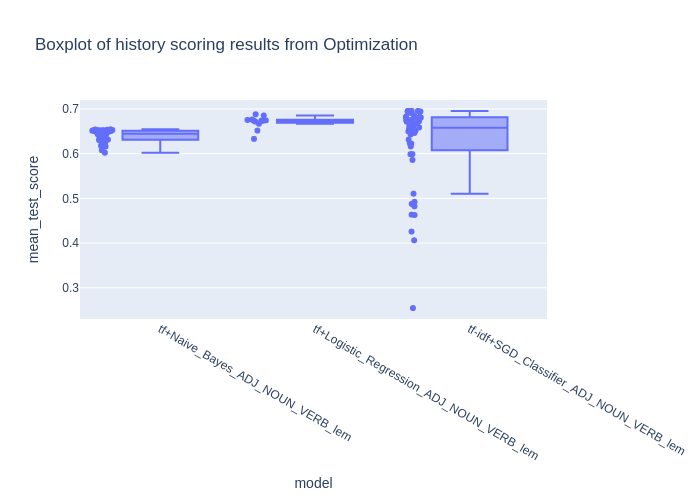

In [18]:
from PIL import Image
Image.open(os.path.join(flags.outdir, 'boxplot_df_all_results.png'))

In [19]:
#try:
#    Image.open(os.path.join(flags.outdir, 'last_logs', 'metric_scores_val.png'))
#except:
#    pass

# Testing on test set from train/test split

In [20]:
#name_logs = 'best_logs'
#on_test_data = True
#autonlp.leader_predict(name_logs = name_logs, on_test_data = on_test_data)

In [21]:
#leaderboard_test = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='test', info_models=autonlp.info_models)
#print('\nTest Leaderboard')
#leaderboard_test

# Testing on other test set

In [22]:
#data_test = pd.read_csv("/kaggle/input/finance-corpus/FinancialPhraseBank_test.csv")

In [23]:
#X_test, doc_spacy_data_test, Y_test = autonlp.preprocess_test_data(data_test)

In [24]:
#name_logs = 'best_logs'
#on_test_data = False
#autonlp.leader_predict(name_logs = name_logs, on_test_data = on_test_data, x = X_test, y=Y_test,
#                       doc_spacy_data_test = doc_spacy_data_test)

In [25]:
#leaderboard_test = autonlp.get_leaderboard(sort_by=flags.sort_leaderboard, dataset='test', info_models=autonlp.info_models)
#print('\nTest Leaderboard')
#leaderboard_test